# Note!
This is a almost cell-by-cell copy of the work done by Aaron Schlegel. I practically don't own any of the work here.
See the original posts here:

[Part 1: Extraction and Feature Engineering](https://aaronschlegel.me/extraction-feature-engineering-aac-data-requests-pandas.html)

[Part 2: Exploratory Data Analysis](https://aaronschlegel.me/exploratory-data-analysis-shelter-cat-outcomes-pandas-seaborn.html)

[Part 3: Machine Learning for Outcome Prediction](https://aaronschlegel.me/predict-shelter-cat-outcomes-scikit-learn-machine-learning.html)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import re
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('aac_shelter_outcomes.csv', parse_dates=['date_of_birth','datetime','monthyear'])
birds_df = df[df.animal_type == 'Bird']
birds_df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
1294,2 months,A683716,Bird,Chicken,Brown/Yellow,2014-05-14,2014-07-16 13:03:00,2014-07-16 13:03:00,NaN,Partner,Transfer,Intact Female
1347,1 year,A666594,Bird,Parakeet Mix,Green,2012-11-04,2013-11-10 16:36:00,2013-11-10 16:36:00,NaN,Partner,Transfer,Intact Male
1563,2 years,A677677,Bird,Bantam Mix,White,2012-04-25,2014-04-29 11:29:00,2014-04-29 11:29:00,NaN,NaN,Adoption,Intact Male
1617,2 weeks,A680862,Bird,Duck,Yellow/Black,2014-05-25,2014-06-10 00:00:00,2014-06-10 00:00:00,NaN,Partner,Transfer,Unknown
1655,1 year,A674618,Bird,Lark Mix,Brown/Black,2013-03-15,2014-03-15 17:54:00,2014-03-15 17:54:00,NaN,Suffering,Euthanasia,Unknown


<ipython-input-3-ac01af068159>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birds_df['age'] = (birds_df.datetime - birds_df.date_of_birth).dt.days


<AxesSubplot:>

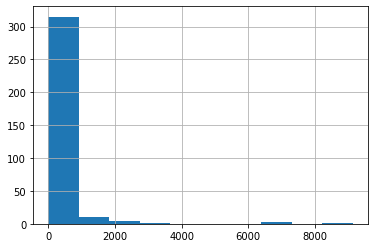

In [3]:
birds_df['age'] = (birds_df.datetime - birds_df.date_of_birth).dt.days
birds_df.age.hist()

In [4]:
birds_df['puppy'] = birds_df.age <= 365


<ipython-input-4-aa86ee821095>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birds_df['puppy'] = birds_df.age <= 365


In [5]:
birds_df.outcome_type.value_counts(dropna=False)

Adoption           114
Transfer            92
Euthanasia          85
Disposal            22
Return to Owner      9
Relocate             7
Died                 4
Missing              1
Name: outcome_type, dtype: int64

In [6]:
birds_df['dob_year'] = birds_df['date_of_birth'].dt.year
birds_df['dob_month'] = birds_df['date_of_birth'].dt.month
birds_df['dob_monthyear'] = pd.to_datetime(
    birds_df['monthyear']).dt.to_period('M')

birds_df['outcome_month'] = birds_df['datetime'].dt.month
birds_df['outcome_year'] = birds_df['datetime'].dt.year
birds_df['outcome_weekday'] = birds_df['datetime'].dt.weekday
birds_df['outcome_hour'] = birds_df['datetime'].dt.hour


<ipython-input-6-3ff4540800b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birds_df['dob_year'] = birds_df['date_of_birth'].dt.year
<ipython-input-6-3ff4540800b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birds_df['dob_month'] = birds_df['date_of_birth'].dt.month
<ipython-input-6-3ff4540800b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [7]:
birds_df['breed'].value_counts()

Chicken Mix         113
Chicken              22
Parakeet Mix         17
Duck Mix             15
Dove Mix             15
Duck                 13
Pigeon Mix           13
Cockatiel Mix         8
Bantam Mix            8
Grackle Mix           8
Pigeon                6
Parakeet              6
Turkey Mix            5
Owl Mix               4
Parrot Mix            4
Hawk                  4
Quaker Mix            4
Grackle               4
Sparrow Mix           4
Rhode Island Mix      3
Cockatoo              3
Heron Mix             3
Peafowl               3
Dove                  3
Mockingbird Mix       3
Bluebird Mix          3
Muscovy Mix           2
Muscovy               2
Heron                 2
Quaker                2
Finch                 2
Parrot                2
Peafowl Mix           2
Conure                2
Mockingbird           1
Owl                   1
Nuthatch Mix          1
Cockatoo Mix          1
African Mix           1
Leghorn Mix           1
Pheasant Mix          1
Vulture Mix     

In [8]:
{k: v for k, v in zip(birds_df['breed'].value_counts().index, birds_df['breed'].value_counts())}


{'Chicken Mix': 113,
 'Chicken': 22,
 'Parakeet Mix': 17,
 'Duck Mix': 15,
 'Dove Mix': 15,
 'Duck': 13,
 'Pigeon Mix': 13,
 'Cockatiel Mix': 8,
 'Bantam Mix': 8,
 'Grackle Mix': 8,
 'Pigeon': 6,
 'Parakeet': 6,
 'Turkey Mix': 5,
 'Owl Mix': 4,
 'Parrot Mix': 4,
 'Hawk': 4,
 'Quaker Mix': 4,
 'Grackle': 4,
 'Sparrow Mix': 4,
 'Rhode Island Mix': 3,
 'Cockatoo': 3,
 'Heron Mix': 3,
 'Peafowl': 3,
 'Dove': 3,
 'Mockingbird Mix': 3,
 'Bluebird Mix': 3,
 'Muscovy Mix': 2,
 'Muscovy': 2,
 'Heron': 2,
 'Quaker': 2,
 'Finch': 2,
 'Parrot': 2,
 'Peafowl Mix': 2,
 'Conure': 2,
 'Mockingbird': 1,
 'Owl': 1,
 'Nuthatch Mix': 1,
 'Cockatoo Mix': 1,
 'African Mix': 1,
 'Leghorn Mix': 1,
 'Pheasant Mix': 1,
 'Vulture Mix': 1,
 'Conure Mix': 1,
 'Wren Mix': 1,
 'Lovebird Mix': 1,
 'Lark Mix': 1,
 'Budgerigar': 1,
 'Hawk Mix': 1,
 'Sparrow': 1,
 'Goose Mix': 1,
 'Crow Mix': 1,
 'Guinea Mix': 1,
 'Bunting': 1,
 'Barred Rock Mix': 1,
 'Song Bird Mix': 1,
 'Cockatiel': 1,
 'Catbird Mix': 1,
 'Silkie Mix'

In [9]:
birds_df.breed.value_counts()[birds_df.breed.value_counts(
) > 10].sum() / len(birds_df)
len(birds_df.breed.unique()), len(birds_df.breed.value_counts()[birds_df.breed.value_counts(
) > 10])


(58, 7)

In [10]:
birds_df['breed'] = birds_df['breed'].str.lower().str.replace('mix', '').str.strip()

<ipython-input-10-983271451ac8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birds_df['breed'] = birds_df['breed'].str.lower().str.replace('mix', '').str.strip()


In [11]:
birds_df.color

1294     Brown/Yellow
1347            Green
1563            White
1617     Yellow/Black
1655      Brown/Black
             ...     
77054     White/Green
77868         Tan/Red
77976       White/Red
78118     Black/White
78206      Gold/Brown
Name: color, Length: 334, dtype: object

In [12]:
birds_df['color'] = [re.sub(' */ *', '/', s).lower() for s in birds_df['color']]
new_cols = birds_df['color'].str.split(
    '/', expand=True).rename(columns={0: 'color1', 1: 'color2'})
birds_df['color1'] = new_cols['color1']
birds_df['color2'] = new_cols['color2']

<ipython-input-12-02b447d7a196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birds_df['color'] = [re.sub(' */ *', '/', s).lower() for s in birds_df['color']]
<ipython-input-12-02b447d7a196>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birds_df['color1'] = new_cols['color1']
<ipython-input-12-02b447d7a196>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [13]:
birds_df.to_csv('birds_df_clean.csv', index=False, encoding='utf-8')